<div class="alert alert-block alert-info">
    <h1>Regressão Linear - Exercício de Fixação</h1>
</div>

http://escolalivre-ia.com.br/

---

<div class="alert alert-block alert-info">
    <h2>Modelo de Previsão do Valor de Venda de Imóveis</h2>
</div>

### Descrição do Exercício e do Conjunto de Dados

Neste exercício, faremos um modelo preditor do valor de venda de um imóvel utilizando a técnica de Regressão Linear. Para tal, utilizaremos o conjunto de dados em anexo, DataSet_Merc_Imob_SF.csv, que apresenta os valores de preço de locação de apartamentos e de área construída.

#### Após analisar o conjunto de dados recebido, apresente os valores de:

    1. Coeficientes Alfa e Beta da Curva de Melhor Ajuste (regressão linear);
    2. Coeficiente de Correlação e R² do conjunto de dados;
    3. Os valores previstos no seu modelo para os seguintes casos:
        a. Preço para um imóvel de 60 m²;
        b. Preço para um imóvel de 120 m²;
        c. Preço para um imóvel de 150 m².


O conjunto de dados DataSet_Merc_Imob_SF.csv é o registro de mais de 11 mil transações imobiliárias realizadas entre Janeiro de 2013 e Dezembro de 2015 cadastradas na Bay Area Home Sales Database, e encontra-se disponível na íntegra neste link:

https://raw.githubusercontent.com/RuiChang123/Regression_for_house_price_estimation/master/final_data.csv 


---
Status: 
<div class="progress">
  <div class="progress-bar" role="progressbar" aria-valuenow="60" aria-valuemin="0" aria-valuemax="100" style="width: 0%;">
    0%
  </div>
</div>

---


### Planejando as Ações:

Neste exercício vamos seguir a sequência de ações listadas abaixo:

- Análise dos Data Sets
    - Obtenção dos Dados
    - Plot Inicial: Primeiras Intuições
    - Remoção de Outliers e Novo Plot


- Análise da Curva de Regressão
    - Obtenção dos Parâmetros
    - Plot da Reta de Melhor Ajuste


- Análise do Modelo Final
    - Cálculo da Correlação
    - Realização de Previsões


---


### Vamos começar:

Ao criar um modelo preditor do preço de venda de um imóvel, podemos utilizar como variáveis independentes diversas características, dentre as quais, podemos destacar:

    - Área Construída
    - Localização (CEP ou Lat/Long)
    - Quantidade de Quartos
    - Quantidade de Banheiros
    - entre outros.

O nosso conjunto de dados apresenta todas essas características, entretanto, para um modelo que utiliza Regressão Linear Simples, isto é, com uma única Variável Independente, vamos selecionar a Área Construída como um estimador do Preço de Venda.


---
Status: 
<div class="progress">
  <div class="progress-bar" role="progressbar" aria-valuenow="60" aria-valuemin="0" aria-valuemax="100" style="width: 10%;">
    10%
  </div>
</div>

---

### Análise Inicial, Primeiros Plots e Intuição:

In [24]:
# Precisamos importar três bibliotecas em Python:
# Pandas, para ler a tabela de dados em .csv,
# Matplotlib, para gerar gráficos e
# Numpy, para funções estatísticas.

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


# Lendo o arquivo de dados 'DataSet_Merc_Imob_SF.csv':
dataset = pd.read_csv("INSIRA_O_NOME_DO_ARQUIVO_DO_CONJUNTO_DE_DADOS.csv") 

# Verificando as 5 primeiras linhas para saber se
# a importação do arquivo foi feita corretamente: 
dataset.head()

,ID,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007,1167508,"975,700",94103,83152781
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,3,Condominium,2004,823719,"975,700",94107,69819817
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3,1425,02/17/2016,1495000,37.759198,-122.396516,Potrero Hill,6,Condominium,2003,1708594,"1,277,600",94107,64972847
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3,2231,02/17/2016,2700000,37.761886,-122.396769,Potrero Hill,10,SingleFamily,1927,2411236,"1,277,600",94107,15149489
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3,1300,02/17/2016,1530000,37.740795,-122.413453,Bernal Heights,4,SingleFamily,1900,1918539,"1,248,000",94110,15161978


#### O que já podemos Identificar nessa visualização:

Ao plotarmos o cabeçalho do nosso Conjunto de Dados - dataset.head() - podemos identificar diversas características interessantes:

1. As colunas que queremos utilizar - área e preço - estão com denominações finishedsqft (Área Construída em sqft, ou pés quadrados) e lastsoldprice (Último Preço de Venda).


2. Vamos precisar converter a área medida em Pés Quadrados para Metros Quadrados. Taxa de Conversão: 1 sqft = 0.09290304 m2.


3. A coluna de preços está medida em Dólares, porém nessa medida temos muitos zeros desnecessários. Vamos utilizar uma boa prática de trazer as escalas mais próximas, dividindo por 1000 e analisando por exemplo uma casa de 1.530.000 será entendida como 1.530 mil.


4. O conjunto de dados apresenta diversas outras informações, que podemos utilizar futuramente para encontrar Clusters de Casas, calcularmos Regressões Multivariadas, entre outros.

---
Status: 
<div class="progress">
  <div class="progress-bar" role="progressbar" aria-valuenow="60" aria-valuemin="0" aria-valuemax="100" style="width: 15%;">
    15%
  </div>
</div>

---

In [25]:
# No Jupyter Notebook, algumas vezes a importação de Bibliotecas pode ficar num bloco de código anterior.

# Nesses casos, ao executar o bloco de código atual, podemos encontrar erros de definição da função,
# pois a chamada da biblioteca ainda não foi executada.

# Nesses casos, é sempre indicado usar: Cell > Run All Above, para executar todos os blocos acima do atual.

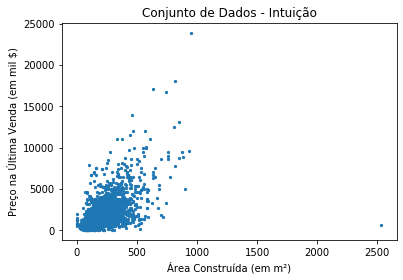

In [26]:
# Extraindo as Colunas:

area_v0 = dataset['NOME_DA_COLUNA_COM_AREAS']
preco_v0 = dataset['NOME_DA_COLUNA_COM_PRECOS']

# Convertendo Unidades e Ajustando Escalas:
area_v1 = [(TAXA_1_SQFT_=_x_M2 * elemento) for elemento in area_v0]
preco_v1 = [(elemento / AJUSTE_ESCALA_MIL_$) for elemento in preco_v0]


plt.figure(figsize=(6,4))

plt.scatter(area_v1, VETOR_QUE_CONTEM_OS_PREÇOS, s=5)
plt.xlabel('Área Construída (em m²)')
plt.ylabel('Preço na Última Venda (em mil $)')
plt.title('Conjunto de Dados - Intuição')
plt.show()

#### O que já podemos Identificar nessa visualização:

Ao plotarmos uma primeira comparação entre Área Construída e Preço de Venda, podemos identificar a necessidade de remoção de alguns dados que vão poluir os resultados:

1. Existe um Outlier em Área bem definido à direita. Esse elemento apresenta uma Área extremamente alta para um preço não compatível, logo devemos excluí-lo.


2. Existe uma linha vertical com cerca de 10 pontos à esquerda, com Área próxima de 0 com preços diferentes e incompatíveis. Antes de excluí-los, devemos criar uma visualização que lhes dê mais destaque para confirmar.


3. Existem potenciais Outliers em Preços, porém também precisamos de uma visualização com mais destaque para confirmar.


4. A Variação em Preço é bem maior que a Variação em Área.

---
Status: 
<div class="progress">
  <div class="progress-bar" role="progressbar" aria-valuenow="60" aria-valuemin="0" aria-valuemax="100" style="width: 25%;">
    25%
  </div>
</div>

---

### Remoção de Outliers e Novo Plot:

Nosso objetivo é definir uma nova variável para que possamos criar visualizações novas, de forma a destacar os elementos que estão apresentando erros ou características divergentes ao nosso modelo.

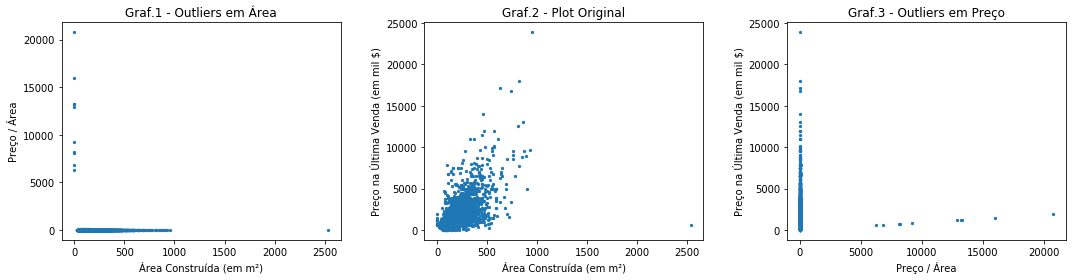

In [27]:
# Criando a variável preco/area para destacar os outliers:
razao = [(p/a) for (p, a) in zip(preco_v1, area_v1)]

# Configurando o Plot de 3 Gráficos Paralelos:
# Ajustando o tamanho total da figura = 3*6x4in
# Com espaçamento 0.3 para visualizar as legendas

plt.figure(figsize=(18,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# Plotagem em 1 Linha, 3 Colunas, Gráfico 1:
plt.subplot(1, 3, 1)
plt.scatter(area_v1, VARIAVEL_QUE_CONTEM_DIVISAO_PRECO/AREA, s=5)
plt.xlabel('Área Construída (em m²)')
plt.ylabel('Preço / Área')
plt.title('Graf.1 - Outliers em Área')


# Plotagem em 1 Linha, 3 Colunas, Gráfico 2:
plt.subplot(1, 3, 2)

plt.scatter(VETOR_QUE_CONTEM_AS_AREAS, preco_v1, s=5)
plt.xlabel('Área Construída (em m²)')
plt.ylabel('Preço na Última Venda (em mil $)')
plt.title('Graf.2 - Plot Original')


# Plotagem em 1 Linha, 3 Colunas, Gráfico 3:
plt.subplot(1, 3, 3)

plt.scatter(razao, preco_v1, s=5)
plt.xlabel('Preço / Área')
plt.ylabel('Preço na Última Venda (em mil $)')
plt.title('Graf.3 - Outliers em Preço')

# Apresentando os 3 gráficos gerados
plt.show();

#### O que já podemos Identificar nessa visualização:

A variável que acabamos de definir: Razão = Preço / Área, amplifica os casos onde Área ~= 0, e é útil para destacar os possíveis erros de input e Outliers no nosso conjunto de dados.

1. Nos Gráf.1 e Gráf.3, queremos excluir os possíveis erros (razão > 5000).


2. Ainda no Gráf.1, queremos excluir o Outlier indiscutível à direita (Área > 1.000).


3. No Gráf.3, queremos excluir os possíveis Outliers ao topo (Preço > 10.000).

Apesar de esses valores não estarem tão destacados da nuvem mais provável como no caso anterior, podemos considerá-los Outliers pois temos mais de 11 mil pontos ocupando 40% da escala (0 a 10mil) e cerca de 10 pontos ocupando os 60% restantes da escala (10 a 25 mil).

É importante ressaltar que, ao excluir esses valores, estou limitando meu modelo preditivo às regiões estabelecidas:

    - Área: de 0 a 1000 m²;
    - Preço: de 0 a US 10 milhões.

---
Status: 
<div class="progress">
  <div class="progress-bar" role="progressbar" aria-valuenow="60" aria-valuemin="0" aria-valuemax="100" style="width: 40%;">
    40%
  </div>
</div>

---

### Finalmente o Novo Plot:

Vamos aplicar as regras de remoção de erros e outliers que identificamos nos passos anteriores e finalmente gerar nosso conjunto de dados tratados (mais confiáveis), à partir do qual calcularemos os parâmetros da reta de regressão e os coeficientes de correlação e determinação (R²).

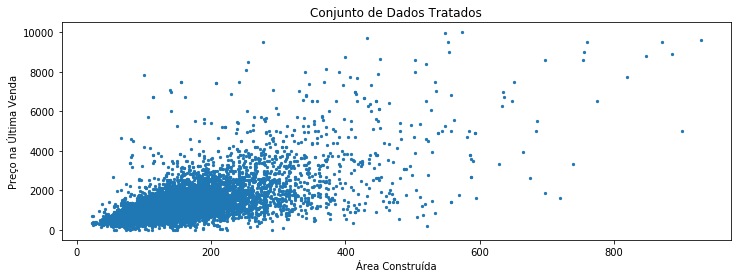

In [28]:
# Relembrando:
# area e preco em v0: Valores brutos retirados da tabela;
# area e preco em v1: Valores brutos, com unidades convertidas;
# area e preco em v2: Valores tratados, com erros e Outliers removidos;


# https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions
# Essa estrutura se chama List Comprehension, uma forma de iterar sobre os valores de uma lista
# Aqui estamos colocando na Tabela 'dados_tratados' todos os pares
# Área_i e Preço_i que atendem às condições listadas.

dados_tratados = [[ar, pr] for (ar, pr) in list(zip(area_v1, preco_v1)) \
                                        if ((pr/ar) < LIMITE_OUTLIER_RAZAO \
                                            and VARIAVEL_QUE_DEVE_SER_MENOR_QUE_1000 < 1000 \
                                            and pr < LIMITE_OUTLIER_PRECO)]


# Aqui estamos usando mais uma vez as List Comprehensions
# para retirar os valores de Área e Preço de 'dados_tratados'
area_v2 = [column[0] for column in dados_tratados]
preco_v2 = [column[1] for ROW(LINHA)_OU_COLUMN(COLUNA) in TABELA_QUE_CONTEM_OS_DADOS_TRATADOS]


# Finalmente, vamos gerar a Visualização dos Dados Tratados
plt.figure(figsize=(12,4))
plt.scatter(area_v2, preco_v2, s=5)
plt.xlabel('Área Construída')
plt.ylabel('Preço na Última Venda')
plt.title('Conjunto de Dados Tratados')

plt.show()

#### O que já podemos Identificar nessa visualização:

Primeiramente, parabéns por ter chegado até aqui.

O processo de Análise de Dados sempre inicia por esse caminho árduo de buscar entender o que está sendo representado no conjunto de dados, e buscar tratar as anomalias antes de tentarmos tirar conclusões.

O nosso conjunto de dados agora parece muito mais estável, representando um comportamento mais previsível. Estamos prontos para iniciar o método de Regressão Linear.

Mas antes disso, três últimas observações:

1. A Análise de remoção de Outliers não precisa necessariamente parar por aqui. Nessa visualização, podemos identificar que alguns imóveis com Área acima de 800 m² poderiam ser removidos também, seguindo a mesma premissa de utilização da escala (6 pontos de aprox. 11 mil estão ocupando 20% da escala). Entretanto, como eles parecem estar alinhados à tendência dos dados, vamos mantê-los.


2. Esse gráfico mostra uma dispersão em preço elevada, principalmente de valores com Área ~= 200 m² com preços bastante elevados. Essa visualização deve reforçar a nossa intuição que existem outros fatores relevantes para a predição do Preço que não estão contabilizados, como Localização, por exemplo.


3. Observando essa Dispersão, em quanto você estima os valores do Coef. de Correlação e de Determinação?


Eu estimo que a variável Área deve explicar cerca de metade do Erro na previsão do Preço, logo espero um R² ~= 0.5, o que nos daria um coeficiente de correlação (R) ~= de aproximadamente 0,7.

---
Status: 
<div class="progress">
  <div class="progress-bar" role="progressbar" aria-valuenow="60" aria-valuemin="0" aria-valuemax="100" style="width: 50%;">
    50%
  </div>
</div>

---

### Parâmetros da Regressão Linear Simples

Finalmente chegamos ao passo que tanto esperávamos: a reta de regressão!

Nesse processo, vamos relembrar como fazemos a obtenção dos parâmetros e plotar a reta contra os nossos dados.

---

Solução Generalista - através de Métodos Numéricos:
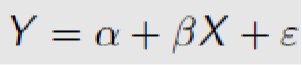

Solução Analítica - Parâmetros possuem Fórmulas Definidas:<br>
(Válido para o caso específico da Regressão Linear)

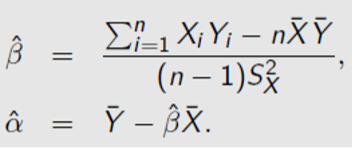

In [29]:
# Para não ter que re-importar a biblioteca numpy
# É Indicado usar: Cell > Run All Above
# (remova o # do comentário abaixo se quiser rodar apenas essa célula)
# import numpy as np


# Relembrando:
# area e preco em v2: Valores tratados, com erros e Outliers removidos;


# Há duas formas para calcular o Valor de Beta:

# através da variância Sx² ajustada por (n-1)/n,
# beta = (np.cov(area_v2, preco_v2)[0,1] * (n))/(np.var(area_v2) * (n-1))

# ou através dos valores exatos da Matriz de Covariância.
# beta = np.cov(area_v2, preco_v2)[0,1]/np.cov(area_v2, preco_v2)[0,0]


# Utilizando as Definições da Matriz de Covariância, temos:
beta = np.cov(area_v2, preco_v2)[0,1] / np.____________________[0,0]

# À partir de Beta, temos o valor de Alfa:
___ = np.mean(________) - beta * np.mean(area_v2)

# Arredondando os Valores para 2 casas Decimais
print('Coeficiente Angular: ', round(____, 2))

print('Coeficiente Linear: ', round(alfa, __))

Coeficiente Angular:  7.66
Coeficiente Linear:  124.29


---

Status: 
<div class="progress">
  <div class="progress-bar" role="progressbar" aria-valuenow="60" aria-valuemin="0" aria-valuemax="100" style="width: 60%;">
    60%
  </div>
</div>

---

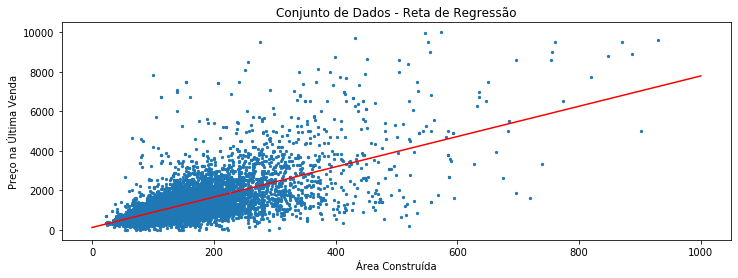

In [30]:
# Com os parâmetros Alfa e Beta Definidos, podemos plotar a Reta de Regressão:

# Plotando inicialmente a nuvem de pontos:
plt.figure(figsize=(12,4))
plt.scatter(area_v2, preco_v2, s=5)

# Definindo os Valores de x para os quais a
# reta será definida (de 0 a 1000 m²):
x = np.linspace(0, 1000)

# Definindo a Equação da Função de Previsão
# (ou seja, da Reta de Regressão)
preco_previsto = alfa + _____ * x

# Plotando a Curva 'preco_previsto' em vermelho (r = red)
plt.plot(x, preco_previsto, c='r')

plt.xlabel('Área Construída')
plt.ylabel('Preço na Última Venda')
plt.title('Conjunto de Dados - Reta de Regressão')
plt.plot();

#### O que já podemos Identificar nessa visualização:

Ah, finalmente chegamos no objetivo do Exercício!

Já temos um modelo preditivo e posso utilizar para estimar os valores de Preços de futuras Vendas.

Mas acho que você já percebeu que o mais importante não é chegar em valores, mas as sacadas e as intuições ao longo do caminho.

Dessa forma, antes de calcularmos as questões do Exercício, o que podemos ver nesse gráfico?

1. A Reta de Regressão está bem ajustada ao centro da nuvem onde encontram-se a maior parte dos dados, porém a medida que a Área Construída aumenta, o modelo parece não conseguir capturar as novas nuances do mercado imobiliário.


2. A existência de diversos pontos muito acima da reta desde o início do intervalo de análise (já à partir de 100 m²) pressupõe que existem outros fatores em jogo, como localização, ou que deveríamos separar esses imóveis em 2 grupos - casas de alto padrão, e casas de baixo padrão - e traçarmos retas de previsão para cada um destes grupos.

---

Status: 
<div class="progress">
  <div class="progress-bar" role="progressbar" aria-valuenow="60" aria-valuemin="0" aria-valuemax="100" style="width: 70%;">
    70%
  </div>
</div>

---

### Fazendo Previsões através da Curva de Regressão

De acordo com o enunciado, devemos estimar os valores previstos para os seguintes casos:
 - Preço para um imóvel de 60 m²;
 - Preço para um imóvel de 120 m²;
 - Preço para um imóvel de 150 m².

O Preço de Venda Previsto para um imóvel com Área de 60 m² é de : US$ 584.0 mil
O Preço de Venda Previsto para um imóvel com Área de 120 m² é de : US$ 1044.0 mil
O Preço de Venda Previsto para um imóvel com Área de 150 m² é de : US$ 1274.0 mil


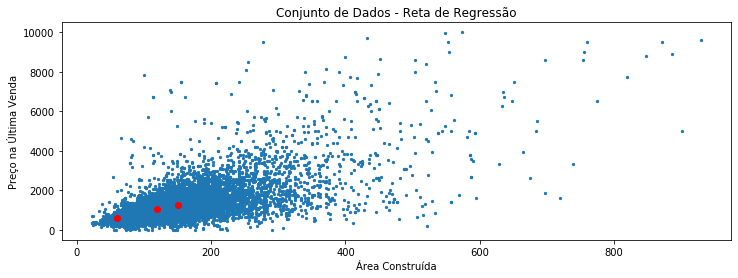

In [31]:
# Plotando inicialmente a nuvem de pontos, para referência:
plt.figure(figsize=(12,4))
plt.scatter(area_v2, preco_v2, s=5)

# Definindo as Áreas para cálculo do Preço:
area_questao = [__, ___, ___]

# Definindo a Equação da Função de Previsão
preco_questao = [alfa + beta * x for x in VETOR_QUE_CONTEM_AS_AREAS_DA_QUESTAO]

# Imprimindo os Valores de Preços Previstos com List Comprehensions:
[print("O Preço de Venda Previsto para um imóvel com Área de", ar, "m² é de : US$", round(pr), "mil") \
 for ar, pr in zip(area_questao, preco_questao)]

# Plotando os pontos de preço previsto no gráfico,
# para referência, em vermelho (r = red)
plt.scatter(area_questao, VETOR_QUE_CONTEM_OS_PRECOS_PREVISTOS, c='r')
plt.xlabel('Área Construída')
plt.ylabel('Preço na Última Venda')
plt.title('Conjunto de Dados - Reta de Regressão')
plt.plot();

#### O que já podemos Identificar nessa visualização:

Com a Reta de Regressão, já conseguimos realizar previsões, porém, quando colocamos os nossos dados em perspectiva com os pontos do Gráfico, podemos perceber que há bastante variação em relação aos valores que previmos.  

Neste momento, ficamos cada vez mais curiosos pra saber quais serão os Coeficientes de Correlação e Determinação, para avaliarmos a assertividade do nosso modelo, e o como poderemos melhorá-lo, adicionando variáveis e algoritmos para encontrar previsões melhores.

---

Status: 
<div class="progress">
  <div class="progress-bar" role="progressbar" aria-valuenow="60" aria-valuemin="0" aria-valuemax="100" style="width: 80%;">
    80%
  </div>
</div>

---

### Análise do Modelo Final

Vamos avaliar os coeficientes e verificar quão ajustado é o nosso modelo aos dados, e quanto das variações que existem no mercado imobiliário ele consegue capturar e explicar.

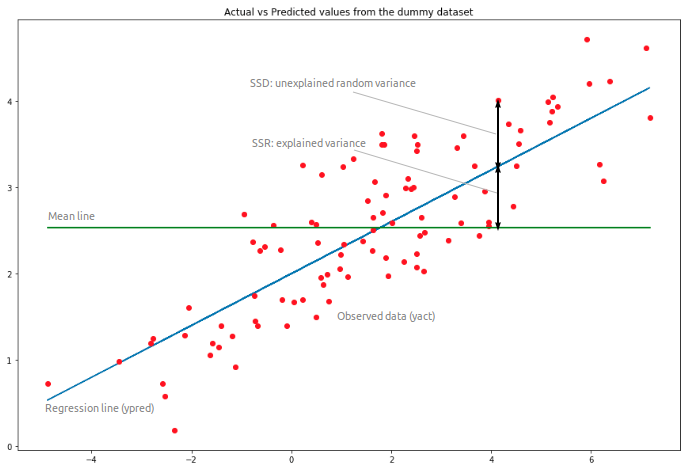

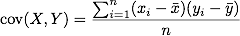

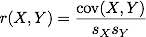

In [32]:
# Para não ter que re-importar a biblioteca numpy
# É Indicado usar: Cell > Run All Above
# (remova o # do comentário abaixo se quiser rodar apenas essa célula)
# import numpy as np


# Utilizando a mesma definição da Matriz de Covariância
# para a obtenção das Var(x) e Var(y) já ajustadas:

cov_area_preco = np.cov(area_v2, preco_v2)[0,1] 
var_area = np.______________________[0,0]        # => S²_area
var_preco = np.cov(______, preco_v2)[1,1]       # => S²_preco


# Calculando a Correlação, lembrando que var_x = S²_x
correlacao_r = cov_area_preco / np.sqrt(________ * var_preco)

print("Coeficiente de Correlação (R) = ", round(correlacao_r, ____))


# Calculando a Determinação
determinacao_R_2 = ________________**2

print("Coeficiente de Correlação (R_2) = ", round(determinacao_R_2, 4))


Coeficiente de Correlação (R) =  0.6634
Coeficiente de Correlação (R_2) =  0.4401


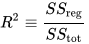

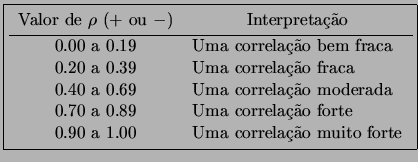

#### O que já podemos Identificar nessa visualização:

Já esperávamos que o modelo fosse capaz de explicar cerca de metade das variações (R² ~= 0.5), entretanto, ao plotar os nosso Preços previstos, já vimos que os valores deveriam ser ainda menores.

De qualquer forma, esse é o último passo quantitativo do nosso modelo, e podemos dizer que concluímos uma Análise de Previsão utilizando a técnica da Regressão Linear Simples, de única variável.

Mas porque nosso Status ainda está em 90%?

Porque nosso trabalho só termina quando temos uma intuição de como melhorar nosso modelo, e é o que vamos fazer nas Considerações Finais.

---

Status: 
<div class="progress">
  <div class="progress-bar" role="progressbar" aria-valuenow="60" aria-valuemin="0" aria-valuemax="100" style="width: 90%;">
    90%
  </div>
</div>

---

### Considerações Finais

Temos que ter em mente que em exemplos reais, coeficientes de correlação fortes (+ 0.70) e muito fortes (+0.90) são extremamente raros, sendo mais comum encontrarmos correlações moderadas.

Isso significa que estamos trabalhando nos problemas mais difíceis, os que não tem uma solução direta e clara, os que necessitam análises mais aprofundadas nos dados, em busca dos insights que ainda não foram descobertos.

---

Ao fim do nosso modelo, descobrimos que a Variável Área Construída consegue explicar cerca de 44% da variabilidade nos Preços de Venda. Ao longo da análise, criamos as seguintes hipóteses:

   - Um modelo com mais variáveis independentes poderia melhorar nossa assertividade.
       - Localização,
       - Ano desde a última Reforma, etc.
       
Esse modelo de múltiplas variáveis é conhecido como Regressão Linear Multivariada.


   - Um mecanismo de separar grupos de dados (clusters) poderia melhorar a nossa assertividade.
       - Criando um modelo de regressão para casas de alto padrão,
       - Criando um modelo de regressão para casas de baixo padrão, etc.

Esse tipo de algoritmo de agrupamento é chamado de clusterização, sendo o K-means um bastante conhecido.

---

Mas como podemos verficar que existem dois grupos diferentes no nosso conjunto de dados?

Basta procurar comportamentos fundamentalmente distindos, ou variações ortogonais.

Lembram da variável que definimos: Razão = Preço / Área?

Vamos voltar a ela e fazer uma última análise para deixar isso mais claro:

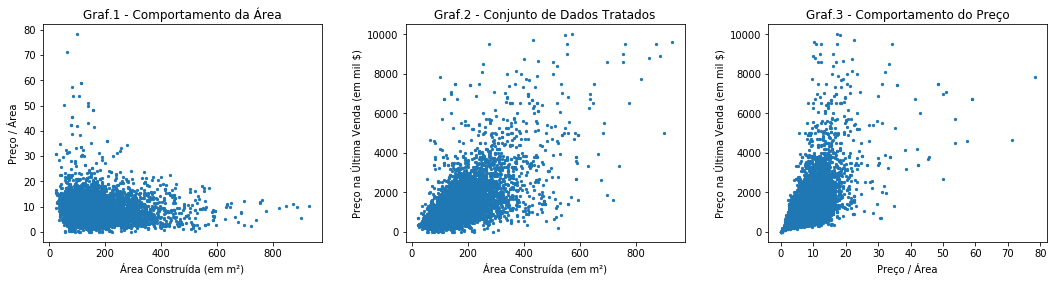

In [33]:
# Recalculando a Razão = Preço / Área com os dados tratados
razao_v2 = [(p/a) for (p, a) in zip(preco_v2, area_v2)]

# Configurando o Plot de 3 Gráficos Paralelos:
# Ajustando o tamanho total da figura = 3*6x4in
# Com espaçamento 0.3 para visualizar as legendas

plt.figure(figsize=(18,4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

# Plotagem em 1 Linha, 3 Colunas, Gráfico 1:
plt.subplot(1, 3, 1)
plt.scatter(area_v2, razao_v2, s=5)
plt.xlabel('Área Construída (em m²)')
plt.ylabel('Preço / Área')
plt.title('Graf.1 - Comportamento da Área')


# Plotagem em 1 Linha, 3 Colunas, Gráfico 2:
plt.subplot(1, 3, 2)

plt.scatter(area_v2, preco_v2, s=5)
plt.xlabel('Área Construída (em m²)')
plt.ylabel('Preço na Última Venda (em mil $)')
plt.title('Graf.2 - Conjunto de Dados Tratados')


# Plotagem em 1 Linha, 3 Colunas, Gráfico 3:
plt.subplot(1, 3, 3)

plt.scatter(razao_v2, preco_v2, s=5)
plt.xlabel('Preço / Área')
plt.ylabel('Preço na Última Venda (em mil $)')
plt.title('Graf.3 - Comportamento do Preço')

# Apresentando os 3 gráficos gerados
plt.show();

#### O que podemos Identificar nessa visualização:

Existem dois grupos diferentes no nosso conjunto de dados, e precisamos saber qual dos gráficos acima devemos utilizar para identificar esse fenômeno.

Qual Gráfico você utilizaria?

1. No Gráf.1, podemos identificar um comportamento ortogonal entre alguns elementos. Existem unidades pequenas com preço extremamente elevados! Deve haver um fator de Localização extremamente importante, ou um fator de Residência de Alto Padrão que explique esse grupo de dados (cluster).


2. No Gráf.2, os pontos estào espalhados de forma a cobrir melhor a área do gráfico, dificultando essa identificação. Entretanto, temos uma intuição que algo está acontecendo além da variação da Área, pois os pontos estão bastante dispersos.


3. No Gráf.3, podemos perceber que os pontos estão distribuídos como as arestas de um triângulo partindo da origem. Apesar de não representar a existência de grupos de dados (clusters) tão claramente quando o Gráf.1, esse Plot já indica que deveríamos ter duas Retas de Regressão, acompanhando cada uma dessas arestas.

Eu utilizaria o Gráf.1 para identificar que os grupos de dados (clusters) existem, mas utilizaria o Gráf.3 para plotar as duas curvas de regressão para cada um desses clusters.

E você, o que faria? Conta pra gente nos nossos contatos e redes sociais.

http://escolalivre-ia.com.br/

---
Status: 
<div class="progress">
  <div class="progress-bar" role="progressbar" aria-valuenow="60" aria-valuemin="0" aria-valuemax="100" style="width: 100%;">
    100%
  </div>
</div>

---